In [1]:
!pip install pandas regex

In [6]:
!pip install wordcloud

In [2]:
import os
cwd = os.getcwd()
files = os.listdir(cwd)
print('files in %r: %s' % (cwd,files))

files in '/Users/gerrylorinanto': ['.config', 'Music', 'Flask_and_SwaggerUI.ipynb', 'Gelo', '.condarc', 'Chalengge 231103.ipynb', 'Untitled5.ipynb', 'Untitled1.ipynb', 'Challenge 231103.ipynb', '.DS_Store', 'KK Chalengge .ipynb', '.CFUserTextEncoding', '.xonshrc', 'nama_database.db', 'Untitled3.ipynb', 'Untitled.ipynb', '.zshrc', 'File data Import ', 'Untitled4.ipynb', 'Pictures', 'emoji-2.8.0-py2.py3-none-any.whl', '.zprofile', 'Mini challenge 231113.ipynb', '.zsh_history', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', 'KK Chalengge - Final.ipynb', '.cups', 'flagged', 'Public', '.idlerc', '.tcshrc', '.anaconda', 'Movies', 'Applications', 'app.py', 'KK Gold Challenge Analisa Statistik.ipynb', 'log', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Documents', '.mysql_history', '.bash_profile', 'KK Flask_Swagger Gerr.ipynb', 'anaconda3', 'Downloads', '.continuum', '.zsh_sessions', '.conda', 'abusive_database.db']


In [3]:
%cd '/Users/gerrylorinanto/Gelo/Gerry/Binar/Text Data Gold Challenge'

/Users/gerrylorinanto/Gelo/Gerry/Binar/Text Data Gold Challenge


In [7]:
import re
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import re
import pandas as pd
import demoji

# mengambil dafatar kata abusive dan kamus alay dari file csv dan disimpan dalam bentuk dictionary.
abusive_words_df = pd.read_csv("abusive.csv", encoding="ascii")
abusive_words_list = abusive_words_df["ABUSIVE"].tolist()

alay_words_df = pd.read_csv("new_kamusalay.csv", encoding="ISO-8859-1")
alay_words_dict = dict(zip(alay_words_df['anakjakartaasikasik'], alay_words_df['anak jakarta asyik asyik']))

def clean_text():
    text = request.form["text"]
    cleaned_text = demoji.replace(text, " ")
    cleaned_text = re.sub(r"[^\w\s]", " ", cleaned_text)
    return cleaned_text


In [11]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")
df['analisis'] = df.iloc[:, 0]

In [12]:
df['analisis'].head()

0    - disaat semua cowok berusaha melacak perhatia...
1    RT USER: USER siapa yang telat ngasih tau elu?...
2    41. Kadang aku berfikir, kenapa aku tetap perc...
3    USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4    USER USER Kaum cebong kapir udah keliatan dong...
Name: analisis, dtype: object

In [18]:
import pandas as pd
import re
from collections import Counter

abusive_words_df = pd.read_csv("abusive.csv", encoding="ascii")
abusive_words_list = abusive_words_df["ABUSIVE"].tolist()

alay_words_df = pd.read_csv("new_kamusalay.csv", encoding="ISO-8859-1")
alay_words_dict = dict(zip(alay_words_df['anakjakartaasikasik'], alay_words_df['anak jakarta asyik asyik']))


def upload_csv():
    file_path = "data.csv"  # Gantilah 'nama_file.csv' dengan nama file CSV Anda
    df = pd.read_csv(file_path, encoding="ISO-8859-1")

    # Proses pembersihan
    df["cleaned_text"] = df.iloc[:, 0].apply(lambda x: re.sub(r"[^\w\s]", " ", x))
    df["cleaned_text"] = df["cleaned_text"].apply(lambda x: re.compile(r'[\\x]+[a-z0-9]{2}').sub('', x))
    df["cleaned_text"] = df["cleaned_text"].apply(lambda x: ' '.join(alay_words_dict.get(word.lower(), word) for word in x.split()))
    df["cleaned_text"] = df["cleaned_text"].apply(remove_abusive_words)

    # Hitung jumlah karakter dan kata sebelum pembersihan
    jumlah_karakter_sebelum = df.iloc[:, 0].apply(len).sum()
    jumlah_kata_sebelum = df.iloc[:, 0].apply(lambda x: len(re.findall(r'\b\w+\b', x))).sum()

    # Hitung jumlah karakter dan kata setelah pembersihan
    jumlah_karakter_setelah = df['cleaned_text'].apply(len).sum()
    jumlah_kata_setelah = df['cleaned_text'].apply(lambda x: len(re.findall(r'\b\w+\b', x))).sum()

    # Standar Deviasi Sebelum Pembersihan
    std_deviation_sebelum = df.iloc[:, 0].apply(len).std()
        
    # Calculate standard deviation for the 'cleaned_text' column
    std_deviation_setelah = df['cleaned_text'].apply(len).std()
    
    # Hitung kata-kata yang paling banyak muncul
    kata_terbanyak = Counter(' '.join(df['cleaned_text']).split()).most_common(5)

    # Tampilkan hasil
    print(f"Jumlah karakter sebelum pembersihan: {jumlah_karakter_sebelum}")
    print(f"Jumlah kata sebelum pembersihan: {jumlah_kata_sebelum}")
    print(f"Jumlah karakter setelah pembersihan: {jumlah_karakter_setelah}")
    print(f"Jumlah kata setelah pembersihan: {jumlah_kata_setelah}")
    #print("Kata-kata yang paling banyak muncul:")
    for kata, frekuensi in kata_terbanyak:
        print(f"{kata}: {frekuensi}")
    print(f"Standard Deviation Sebelum Pembersihan: {std_deviation_sebelum}")
    print(f"Standard Deviation Setelah Pembersihan: {std_deviation_setelah}")
        
def remove_abusive_words(text):
    """
    Removes abusive words from the text based on the abusive_words_list.

    Parameters:
    - text (str): The input text.

    Returns:
    - str: The text with removed abusive words.
    """
    for word in abusive_words_list:
        # Menambahkan spasi di antara kata yang di-remove
        text = text.replace(word, '')
    return text


if __name__ == "__main__":
    upload_csv()


Jumlah karakter sebelum pembersihan: 1503936
Jumlah kata sebelum pembersihan: 242572
Jumlah karakter setelah pembersihan: 1569221
Jumlah kata setelah pembersihan: 240310
pengguna: 16334
yang: 4843
dan: 4635
tidak: 3103
di: 3008
Standard Deviation Sebelum Pembersihan: 69.07561994872697
Standard Deviation Setelah Pembersihan: 73.121178242725


Standard Deviation Sebelum Pembersihan: 69.07561994872697
Standard Deviation Setelah Pembersihan: 73.121178242725


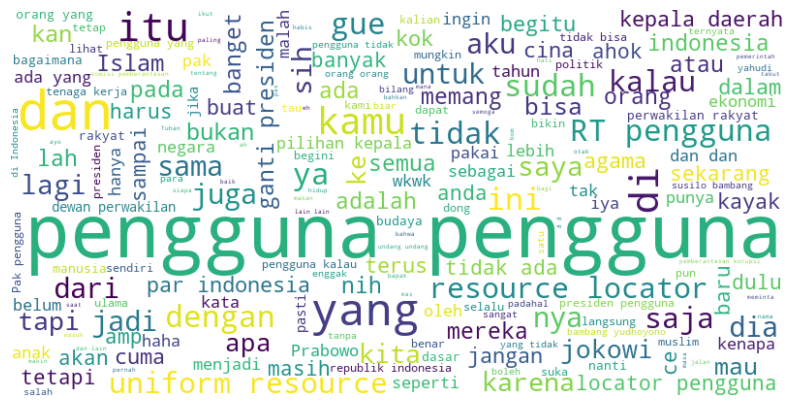

In [14]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

abusive_words_df = pd.read_csv("abusive.csv", encoding="ascii")
abusive_words_list = abusive_words_df["ABUSIVE"].tolist()

alay_words_df = pd.read_csv("new_kamusalay.csv", encoding="ISO-8859-1")
alay_words_dict = dict(zip(alay_words_df['anakjakartaasikasik'], alay_words_df['anak jakarta asyik asyik']))

def upload_csv():
    file_path = "data.csv"  # Replace with the actual path to your CSV file
    df = pd.read_csv(file_path, encoding="ISO-8859-1")

    # Data cleaning process
    df["cleaned_text"] = df.iloc[:, 0].apply(lambda x: re.sub(r"[^\w\s]", " ", x))
    df["cleaned_text"] = df["cleaned_text"].apply(lambda x: re.compile(r'[\\x]+[a-z0-9]{2}').sub('', x))
    df["cleaned_text"] = df["cleaned_text"].apply(lambda x: ' '.join(alay_words_dict.get(word.lower(), word) for word in x.split()))
    df["cleaned_text"] = df["cleaned_text"].apply(remove_abusive_words)

    # Calculate standard deviation before and after cleaning
    std_deviation_before = df.iloc[:, 0].apply(len).std()
    std_deviation_after = df['cleaned_text'].apply(len).std()

    # Display the results
    print(f"Standard Deviation Sebelum Pembersihan: {std_deviation_before}")
    print(f"Standard Deviation Setelah Pembersihan: {std_deviation_after}")

    # Generate and display word cloud
    generate_wordcloud(' '.join(df['cleaned_text']))

def remove_abusive_words(text):
    for word in abusive_words_list:
        text = text.replace(word, '')
    return text

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    upload_csv()


Standard Deviation Sebelum Pembersihan: 69.07561994872697
Standard Deviation Setelah Pembersihan: 73.121178242725


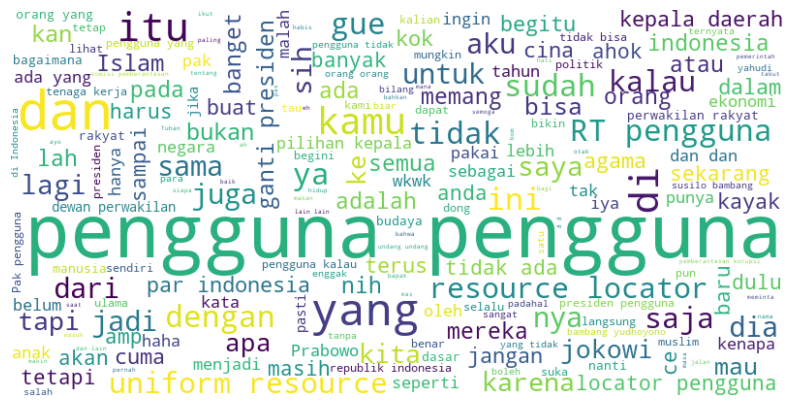

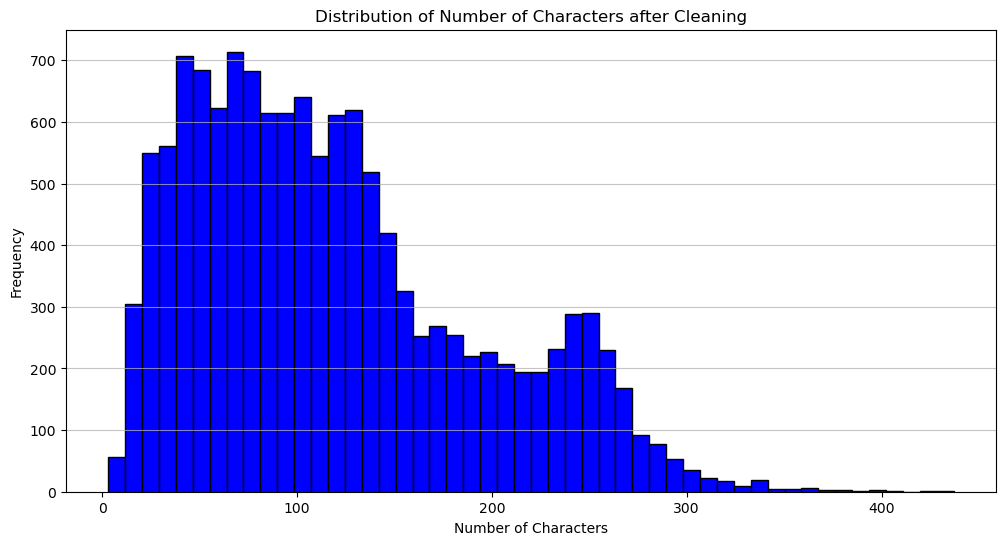

In [19]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

abusive_words_df = pd.read_csv("abusive.csv", encoding="ascii")
abusive_words_list = abusive_words_df["ABUSIVE"].tolist()

alay_words_df = pd.read_csv("new_kamusalay.csv", encoding="ISO-8859-1")
alay_words_dict = dict(zip(alay_words_df['anakjakartaasikasik'], alay_words_df['anak jakarta asyik asyik']))

def upload_csv():
    file_path = "data.csv"  # Replace with the actual path to your CSV file
    df = pd.read_csv(file_path, encoding="ISO-8859-1")

    # Data cleaning process
    df["cleaned_text"] = df.iloc[:, 0].apply(lambda x: re.sub(r"[^\w\s]", " ", x))
    df["cleaned_text"] = df["cleaned_text"].apply(lambda x: re.compile(r'[\\x]+[a-z0-9]{2}').sub('', x))
    df["cleaned_text"] = df["cleaned_text"].apply(lambda x: ' '.join(alay_words_dict.get(word.lower(), word) for word in x.split()))
    df["cleaned_text"] = df["cleaned_text"].apply(remove_abusive_words)

    # Calculate standard deviation before and after cleaning
    std_deviation_before = df.iloc[:, 0].apply(len).std()
    std_deviation_after = df['cleaned_text'].apply(len).std()

    # Display the results
    print(f"Standard Deviation Sebelum Pembersihan: {std_deviation_before}")
    print(f"Standard Deviation Setelah Pembersihan: {std_deviation_after}")

    # Generate and display word cloud
    generate_wordcloud(' '.join(df['cleaned_text']))

    # Generate and display histogram
    plot_histogram(df['cleaned_text'])

def remove_abusive_words(text):
    for word in abusive_words_list:
        text = text.replace(word, '')
    return text

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

def plot_histogram(text_series):
    # Calculate the number of characters for each cleaned text
    text_length = text_series.apply(len)

    plt.figure(figsize=(12, 6))
    plt.hist(text_length, bins=50, color='blue', edgecolor='black')
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    plt.title('Distribution of Number of Characters after Cleaning')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

if __name__ == "__main__":
    upload_csv()
